Mean (mu) of the logarithms of the data: 11.183689651840997
Standard deviation (sigma) of the logarithms of the data: 0.24290014076366737


/var/folders/w3/px1drxv124g_z3hn3m801cz40000gn/T/ipykernel_54632/3444314065.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])


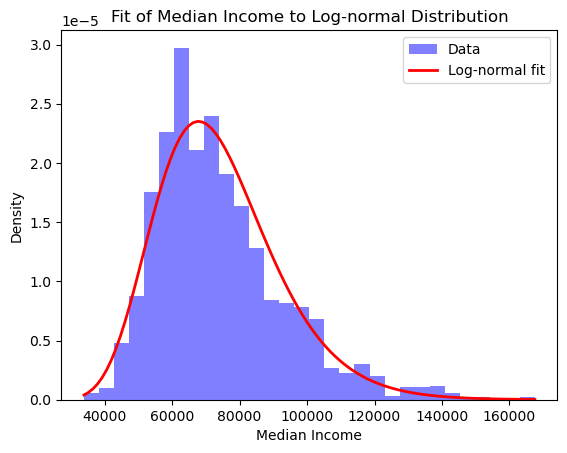

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm

# This is the Affinity data. Replace it with the actual path to the file
df = pd.read_csv('synthetic_dataset.csv')

filtered_df = df[df['mastercard_si_abbr'].astype(str).str.startswith(('44', '45'))]

#This is the ACS County-level data. I got them from this website: https://data.census.gov/table/ACSDP1Y2022.DP03?q=DP03&g=010XX00US$0500000
income_data = pd.read_csv('ACSDP1Y2022.DP03-Data.csv')

filtered_df['date'] = pd.to_datetime(filtered_df['date'])
income_data['extracted_fips'] = income_data['GEO_ID'].str[-5:]
merged_df = pd.merge(filtered_df, income_data[['extracted_fips', 'DP03_0062E']],
                     left_on='county_fips', right_on='extracted_fips', how='inner')
merged_df.rename(columns={'DP03_0062E': 'median_income'}, inplace=True)
merged_df.drop('extracted_fips', axis=1, inplace=True)
merged_df['median_income'] = pd.to_numeric(merged_df['median_income'], errors='coerce')

positive_incomes = merged_df['median_income']
sigma, loc, scale = lognorm.fit(positive_incomes, floc=0)
mu = np.log(scale)

print(f"Mean (mu) of the logarithms of the data: {mu}")
print(f"Standard deviation (sigma) of the logarithms of the data: {sigma}")

n, bins, patches = plt.hist(positive_incomes, bins=30, density=True, alpha=0.5, label='Data', color='blue')
x = np.linspace(positive_incomes.min(), positive_incomes.max(), 100)
pdf_values = lognorm.pdf(x, s=sigma, loc=loc, scale=scale)

plt.plot(x, pdf_values, 'r-', lw=2, label='Log-normal fit')

plt.xlabel('Median Income')
plt.ylabel('Density')
plt.title('Fit of Median Income to Log-normal Distribution')
plt.legend()

plt.show()

/var/folders/w3/px1drxv124g_z3hn3m801cz40000gn/T/ipykernel_54632/2852195315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])
/var/folders/w3/px1drxv124g_z3hn3m801cz40000gn/T/ipykernel_54632/2852195315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['income_quartile'] = pd.to_numeric(filtered_df['income_quartile'])


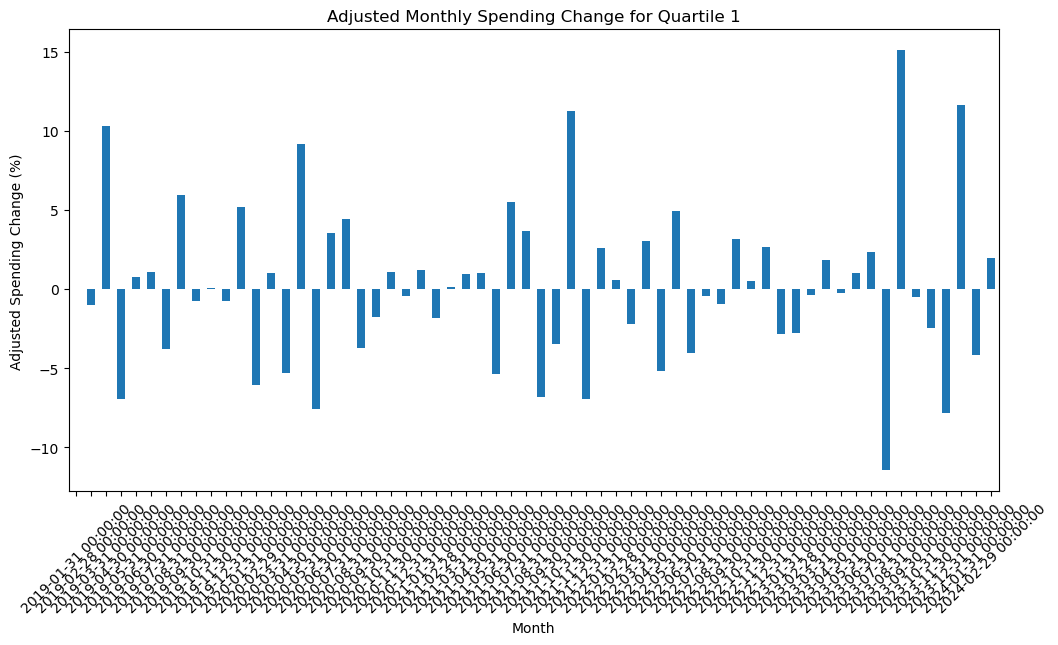

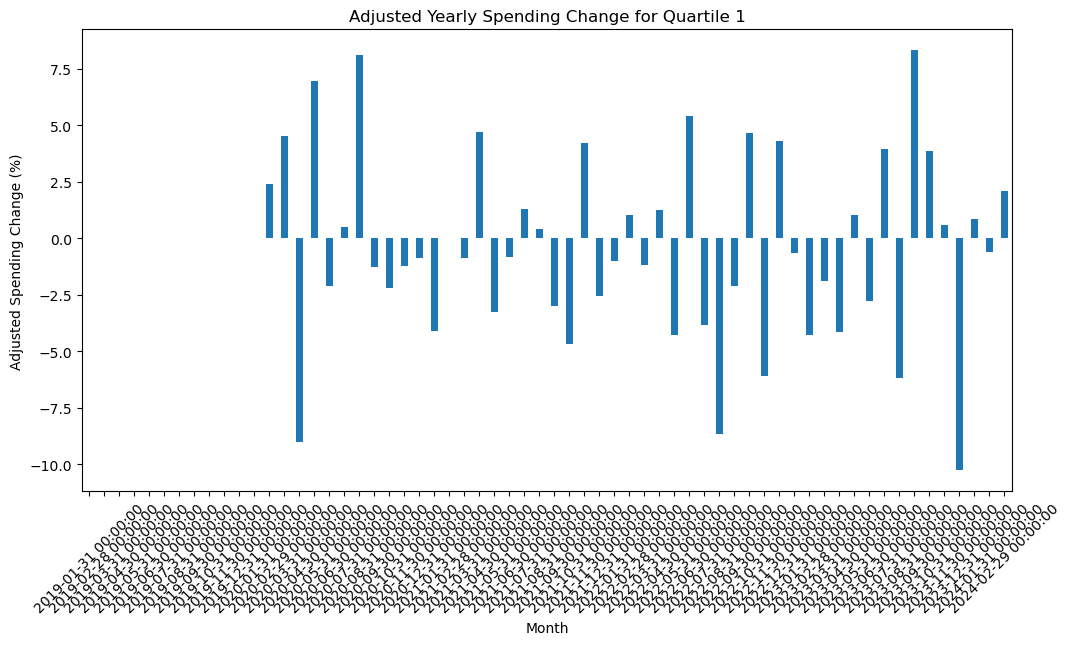

Adjusted Monthly Spending Change for Quartile 1 (cleaned):
 date
2019-02-28    -1.021550
2019-03-31    10.344517
2019-04-30    -6.962328
2019-05-31     0.760125
2019-06-30     1.112082
                ...    
2023-10-31    -2.461564
2023-11-30    -7.846475
2023-12-31    11.618570
2024-01-31    -4.193944
2024-02-29     1.948299
Freq: M, Length: 61, dtype: float64
Adjusted Yearly Spending Change for Quartile 1 (cleaned):
 date
2020-01-31     2.390454
2020-02-29     4.532413
2020-03-31    -8.997161
2020-04-30     6.934542
2020-05-31    -2.124733
2020-06-30     0.490590
2020-07-31     8.091661
2020-08-31    -1.278675
2020-09-30    -2.193695
2020-10-31    -1.214812
2020-11-30    -0.867714
2020-12-31    -4.094245
2021-01-31     0.009083
2021-02-28    -0.885465
2021-03-31     4.711213
2021-04-30    -3.259493
2021-05-31    -0.810563
2021-06-30     1.290502
2021-07-31     0.406259
2021-08-31    -2.984355
2021-09-30    -4.670931
2021-10-31     4.230126
2021-11-30    -2.549180
2021-12-31    -1.00

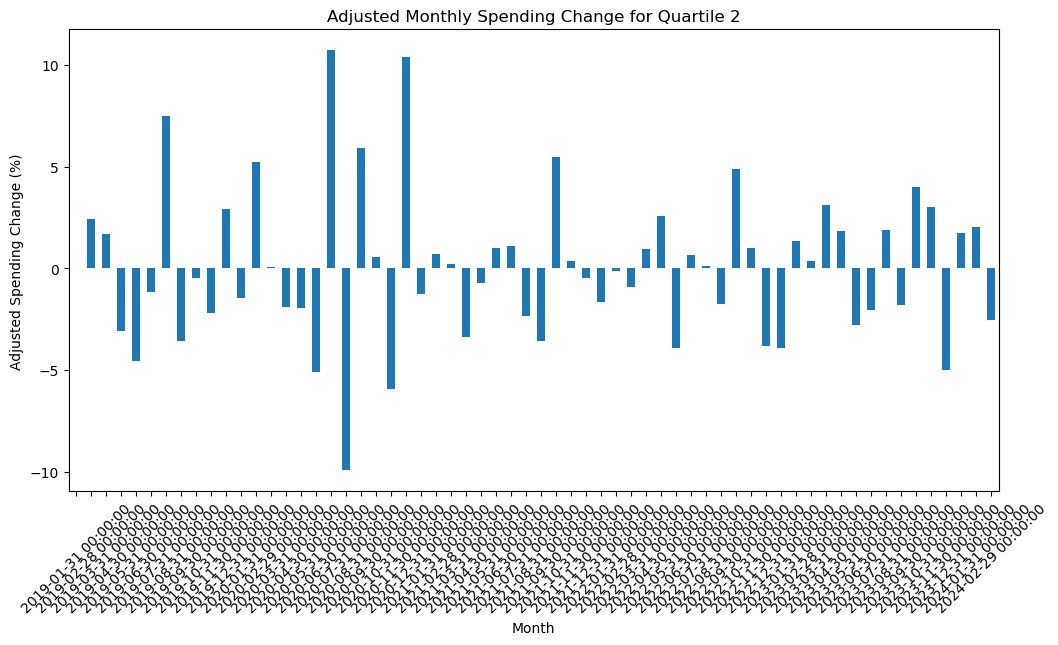

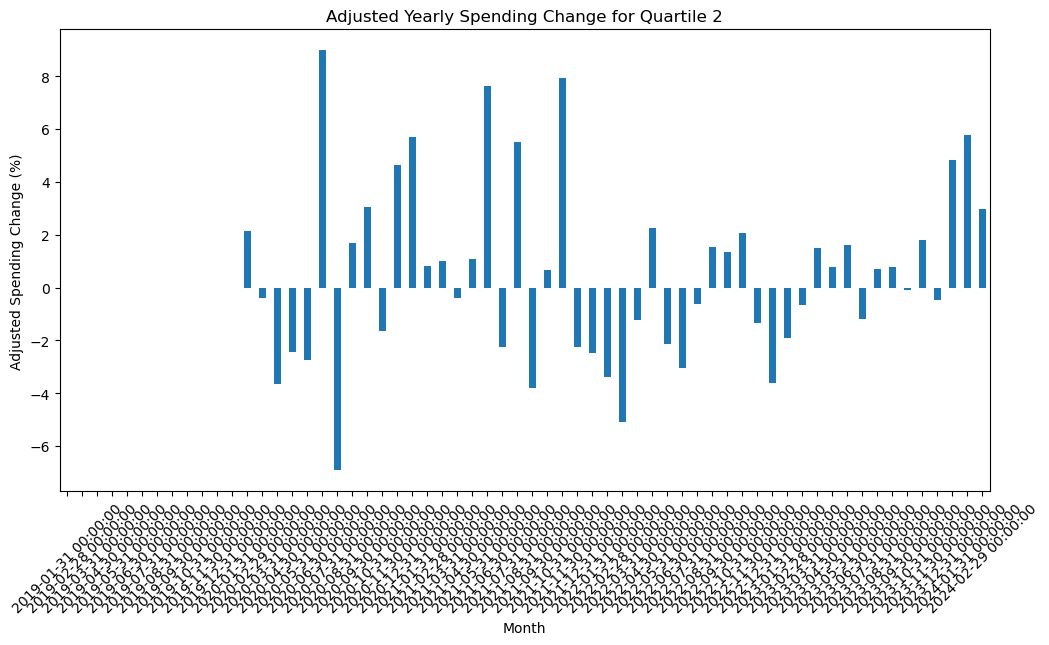

Adjusted Monthly Spending Change for Quartile 2 (cleaned):
 date
2019-02-28    2.432706
2019-03-31    1.686430
2019-04-30   -3.098440
2019-05-31   -4.583687
2019-06-30   -1.150250
                ...   
2023-10-31    3.014652
2023-11-30   -5.004228
2023-12-31    1.740275
2024-01-31    2.043923
2024-02-29   -2.562154
Freq: M, Length: 61, dtype: float64
Adjusted Yearly Spending Change for Quartile 2 (cleaned):
 date
2020-01-31    2.149500
2020-02-29   -0.380327
2020-03-31   -3.647020
2020-04-30   -2.425615
2020-05-31   -2.745535
2020-06-30    8.977196
2020-07-31   -6.924182
2020-08-31    1.669885
2020-09-30    3.033921
2020-10-31   -1.637740
2020-11-30    4.644745
2020-12-31    5.702957
2021-01-31    0.830815
2021-02-28    0.999689
2021-03-31   -0.377593
2021-04-30    1.093129
2021-05-31    7.623615
2021-06-30   -2.261865
2021-07-31    5.516430
2021-08-31   -3.801329
2021-09-30    0.675312
2021-10-31    7.947930
2021-11-30   -2.245881
2021-12-31   -2.477656
2022-01-31   -3.386591
2022-02

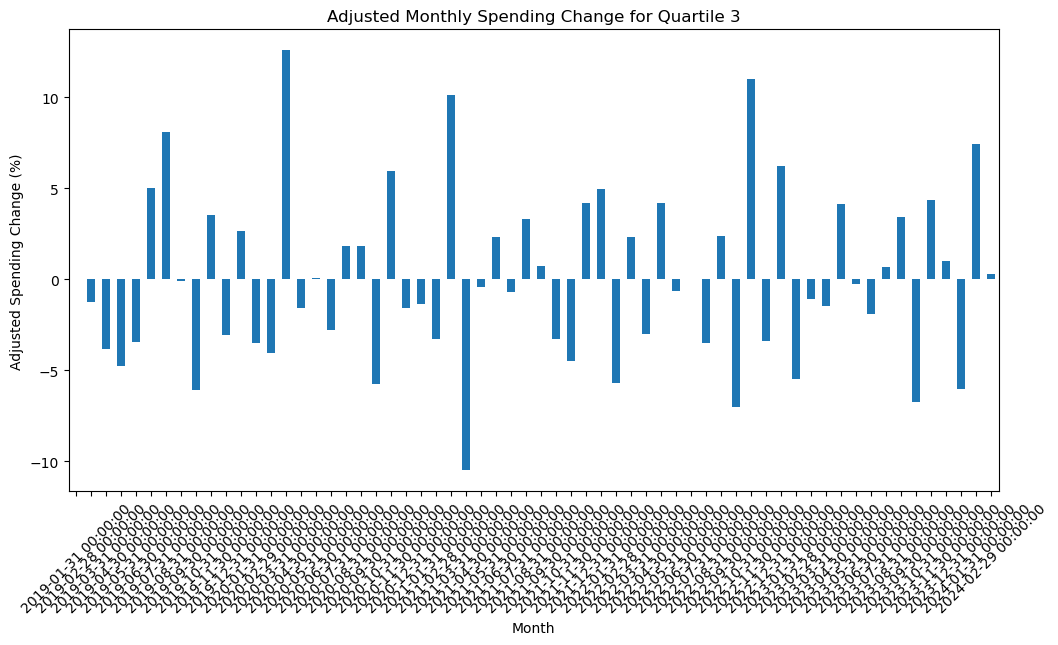

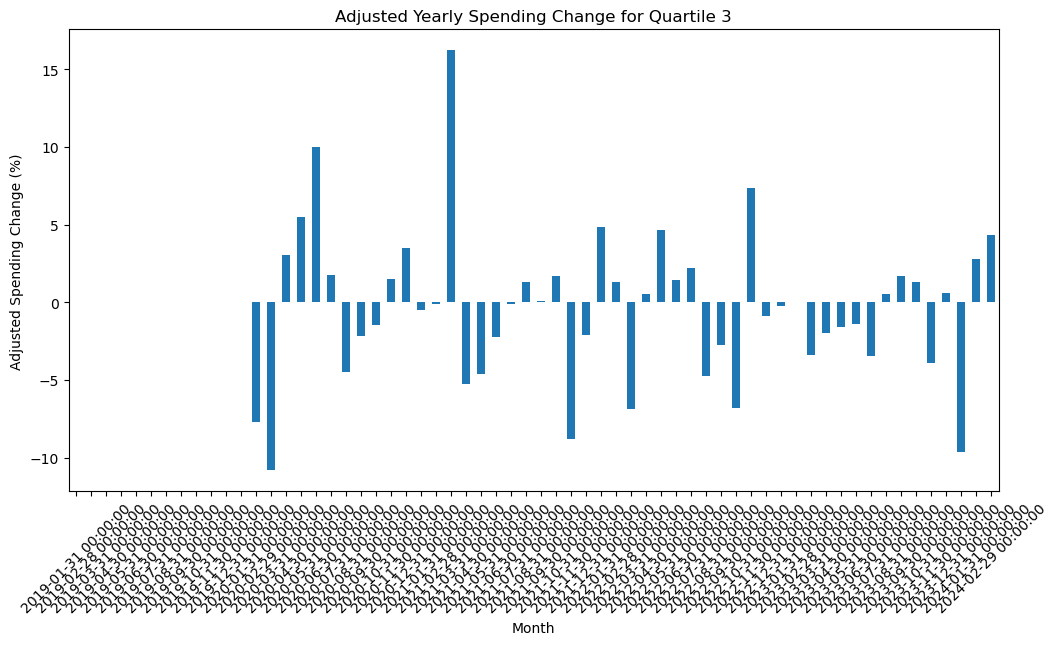

Adjusted Monthly Spending Change for Quartile 3 (cleaned):
 date
2019-02-28   -1.252505
2019-03-31   -3.835100
2019-04-30   -4.765543
2019-05-31   -3.445450
2019-06-30    4.996093
                ...   
2023-10-31    4.381190
2023-11-30    1.030951
2023-12-31   -6.004654
2024-01-31    7.414662
2024-02-29    0.274540
Freq: M, Length: 61, dtype: float64
Adjusted Yearly Spending Change for Quartile 3 (cleaned):
 date
2020-01-31    -7.681439
2020-02-29   -10.810498
2020-03-31     3.026854
2020-04-30     5.506939
2020-05-31     9.966976
2020-06-30     1.739160
2020-07-31    -4.494874
2020-08-31    -2.186241
2020-09-30    -1.427111
2020-10-31     1.525990
2020-11-30     3.481940
2020-12-31    -0.463584
2021-01-31    -0.115008
2021-02-28    16.201198
2021-03-31    -5.230126
2021-04-30    -4.594602
2021-05-31    -2.206595
2021-06-30    -0.130758
2021-07-31     1.286310
2021-08-31     0.095161
2021-09-30     1.697111
2021-10-31    -8.762642
2021-11-30    -2.114592
2021-12-31     4.876850
2022-0

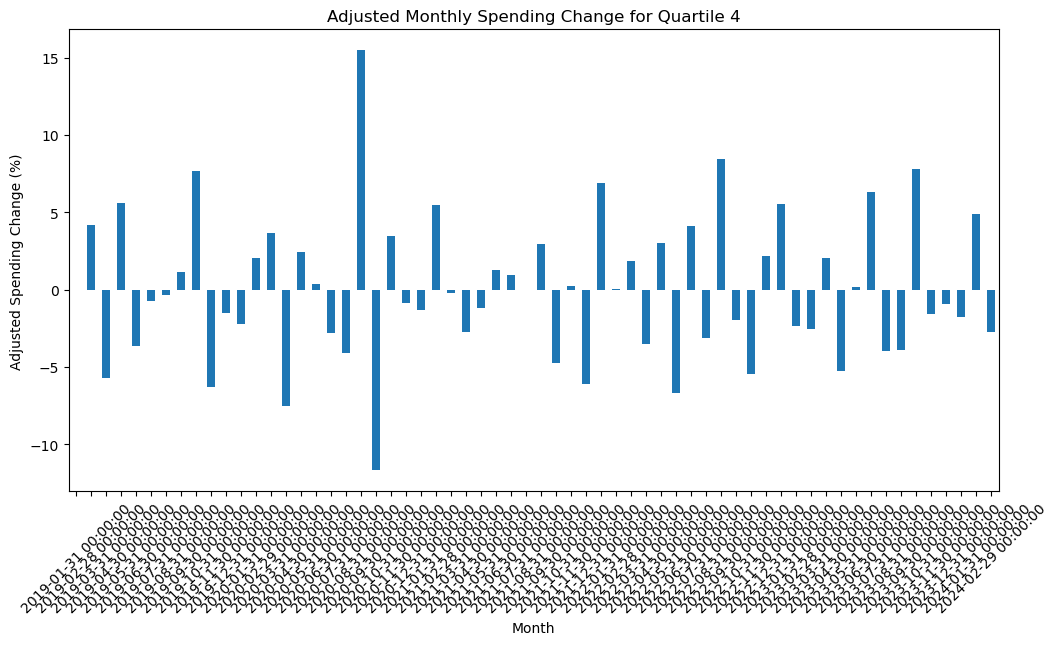

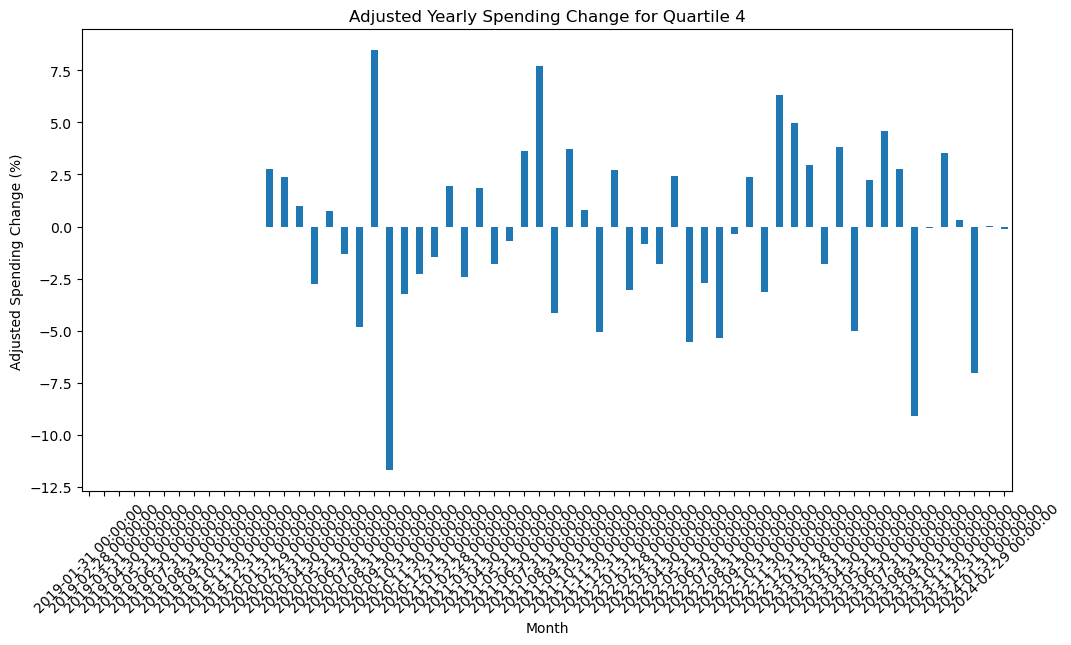

Adjusted Monthly Spending Change for Quartile 4 (cleaned):
 date
2019-02-28    4.184964
2019-03-31   -5.680357
2019-04-30    5.618157
2019-05-31   -3.650925
2019-06-30   -0.730903
                ...   
2023-10-31   -1.579593
2023-11-30   -0.896583
2023-12-31   -1.790329
2024-01-31    4.919460
2024-02-29   -2.704545
Freq: M, Length: 61, dtype: float64
Adjusted Yearly Spending Change for Quartile 4 (cleaned):
 date
2020-01-31     2.763238
2020-02-29     2.360953
2020-03-31     0.965059
2020-04-30    -2.755712
2020-05-31     0.728247
2020-06-30    -1.321538
2020-07-31    -4.831454
2020-08-31     8.448213
2020-09-30   -11.704670
2020-10-31    -3.247264
2020-11-30    -2.300629
2020-12-31    -1.483248
2021-01-31     1.956833
2021-02-28    -2.420177
2021-03-31     1.825457
2021-04-30    -1.807272
2021-05-31    -0.698726
2021-06-30     3.615825
2021-07-31     7.704497
2021-08-31    -4.158777
2021-09-30     3.730820
2021-10-31     0.804697
2021-11-30    -5.063204
2021-12-31     2.727610
2022-0

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# This is the Affinity data. Replace it with the actual path to the file
df = pd.read_csv('synthetic_dataset.csv')

filtered_df = df[df['mastercard_si_abbr'].astype(str).str.startswith(('44', '45'))]

#This is the ACS County-level data. I got them from this website: https://data.census.gov/table/ACSDP1Y2022.DP03?q=DP03&g=010XX00US$0500000
income_data = pd.read_csv('ACSDP1Y2022.DP03-Data.csv')

filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df['income_quartile'] = pd.to_numeric(filtered_df['income_quartile'])
income_data['extracted_fips'] = income_data['GEO_ID'].str[-5:]
merged_df = pd.merge(filtered_df, income_data[['extracted_fips', 'DP03_0062E']],
                     left_on='county_fips', right_on='extracted_fips', how='inner')
merged_df.rename(columns={'DP03_0062E': 'median_income'}, inplace=True)
merged_df.drop('extracted_fips', axis=1, inplace=True)
merged_df['median_income'] = pd.to_numeric(merged_df['median_income'], errors='coerce')

def analyze_spending_and_card_count_for_quartile(quartile):
    df_filtered = merged_df[merged_df['income_quartile'] == quartile]
    
    monthly_spending = df_filtered.resample('M', on='date')['total_spend'].sum()
    monthly_card_count = df_filtered.resample('M', on='date').size()
    
    monthly_spending_change = monthly_spending.pct_change() * 100
    monthly_card_count_change = monthly_card_count.pct_change() * 100
    
    yearly_spending_change = monthly_spending.pct_change(periods=12) * 100
    yearly_card_count_change = monthly_card_count.pct_change(periods=12) * 100
    
    adjusted_monthly_spending_change = monthly_spending_change - monthly_card_count_change
    adjusted_yearly_spending_change = yearly_spending_change - yearly_card_count_change
    
    adjusted_monthly_spending_change.plot(kind='bar', figsize=(12, 6), title=f'Adjusted Monthly Spending Change for Quartile {quartile}')
    plt.xlabel('Month')
    plt.ylabel('Adjusted Spending Change (%)')
    plt.xticks(rotation=45)
    plt.show()
    
    adjusted_yearly_spending_change.plot(kind='bar', figsize=(12, 6), title=f'Adjusted Yearly Spending Change for Quartile {quartile}')
    plt.xlabel('Month')
    plt.ylabel('Adjusted Spending Change (%)')
    plt.xticks(rotation=45)
    plt.show()
    
    print(f"Adjusted Monthly Spending Change for Quartile {quartile} (cleaned):\n", adjusted_monthly_spending_change.dropna())
    print(f"Adjusted Yearly Spending Change for Quartile {quartile} (cleaned):\n", adjusted_yearly_spending_change.dropna())

for quartile in range(1, 5):
    analyze_spending_and_card_count_for_quartile(quartile)